# Problem 3. Model Training

## Preparation

In [1]:
import numpy as np
import pandas as pd
Train_df = pd.read_csv('/Users/weisihan/Downloads/we_data/train_newfeature.csv')
Valid_df = pd.read_csv('/Users/weisihan/Downloads/we_data/valid_newfeature.csv')

In [38]:
Train_dff = pd.read_csv('/Users/weisihan/Downloads/we_data/mytrainingset.csv')

In [2]:
"""
Train_df_model = Train_df.copy()
Train_df_model.head()
"""

'\nTrain_df_model = Train_df.copy()\nTrain_df_model.head()\n'

In [3]:
"""
# bids which click =1
df1 = Train_df_model[Train_df_model['click']==1]
# bids which click =0
df0 = Train_df_model[Train_df_model['click']==0]
# get 10% of click =0 data, down sampling
df2=df0.sample(frac=0.1)
# combine 10% of click =0 data and all click=1, down sampling
combined_df = pd.concat([df1, df2],axis=0)
combined_df.head()
#combined_df.shape
#(244712, 552)
#(244712, 127)
"""

## Feature Selection

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [9]:
# columns of without click
cols=list(combined_df.columns)[1:]

In [10]:
train = combined_df
train_y = train['click']
train_x = train[cols]

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 50)
rfe = rfe.fit(train_x, train_y )
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True  True False False False
 False  True False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False  True  True False  True False  True  True False False
 False  True False False False False False False  True False False  True
  True  True  True  True False  True False False  True False  True False
 False  True False False False False False False  True False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [82]:
"""arr = rfe.ranking_[0:]
array_index=[]
#arr"""

'arr = rfe.ranking_[0:]\narray_index=[]\n#arr'

In [83]:
"""for i in range(len(arr)):
    if arr[i]<50:
        array_index.append(i)
    """

In [84]:
filtered_cols=[]

In [78]:
for i in array_index:
    filtered_cols.append(cols[i])

In [80]:
top_50_cols=filtered_cols
X=train[top_50_cols]
y=train['click']

## Model.  Logistic Regression


In [3]:
cols=list(Train_df.columns)[1:]

In [5]:
Train_df.head()

click  slotwidth  slotheight  slotprice  android  ios  linux  mac  other  \
0      0        200         200          5        0    0      0    0      0   
1      0        300         250          0        0    0      0    0      0   
2      0        250         250          5        0    0      0    0      0   
3      0        160         600          0        0    0      0    0      0   
4      0        728          90        133        0    0      0    0      0   

   windows       ...         slotformat_Na  advertiser_1458  advertiser_2259  \
0        1       ...                     0                0                0   
1        1       ...                     1                0                0   
2        1       ...                     0                0                0   
3        1       ...                     0                1                0   
4        1       ...                     1                0                1   

   advertiser_2261  advertiser_2821  advertiser_2997  advertiser_3358  \
0                0                0                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   advertiser_3386  advertiser_3427  advertiser_3476  
0                0                1                0  
1                0                0                0  
2                0                1                0  
3                0                0                0  
4                0                0                0  

[5 rows x 127 columns]

In [6]:
l_train_y = Train_df['click']
l_train_x = Train_df[cols]

In [39]:
"""train_y = Train_dff['click']
train_x = Train_dff[cols]"""

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(l_train_x, l_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
"""from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(train_x, train_y)"""

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
#test the default model
test_x = Valid_df[cols]
test_predictions = logreg.predict_proba(test_x)[:, 1]
test_predictions_class = logreg.predict(test_x)

In [41]:
"""#test the default simplified model
test_x1 = Valid_df[cols]
test_predictions1 = logreg1.predict_proba(test_x1)[:, 1]
test_predictions_class1 = logreg1.predict(test_x1)"""

In [42]:
"""test_predictions1"""

array([ 0.00596817,  0.00289365,  0.00121826, ...,  0.00532205,
        0.00028585,  0.00363697])

In [10]:
test_predictions

array([  7.58434665e-04,   3.09625705e-04,   1.06439157e-04, ...,
         5.30759484e-04,   4.56972592e-05,   3.14535261e-04])

In [11]:
test_result = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
test_result['click']= Valid_df['click'].copy()
test_result['click_pred_per'] = test_predictions
test_result['click_pred_class'] = test_predictions_class
test_result.head()

click  click_pred_per  click_pred_class
0      0        0.000758                 0
1      0        0.000310                 0
2      0        0.000106                 0
3      0        0.000157                 0
4      0        0.000429                 0

In [43]:
"""test_result1 = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
test_result1['click']= Valid_df['click'].copy()
test_result1['click_pred_per'] = test_predictions1
test_result1['click_pred_class'] = test_predictions_class1
test_result1.head()"""

click  click_pred_per  click_pred_class
0      0        0.005968                 0
1      0        0.002894                 0
2      0        0.001218                 0
3      0        0.001809                 0
4      0        0.003829                 0

In [24]:
y_pred_prob = logreg.predict_proba(test_x)[:, 1]
y_pred_prob

array([ 0.00617648,  0.00326028,  0.00099448, ...,  0.00568581,
        0.00033401,  0.00361342])

In [44]:
"""y_pred_prob1 = logreg1.predict_proba(test_x1)[:, 1]
y_pred_prob1"""

array([ 0.00596817,  0.00289365,  0.00121826, ...,  0.00532205,
        0.00028585,  0.00363697])

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


y_test = test_result['click']
y_pred_class = test_result['click_pred_class']

print(confusion_matrix(y_test, y_pred_class))

confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)

#准确率、识别率（Classification Accuracy）：分类器正确分类的比例
#print ((TP+TN) / float(TP+TN+FN+FP))
print ("Accuracy: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0) )

#灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
#print (TP / float(TP+FN))
#recall = metrics.recall_score(y_test, y_pred_class)
print ("Recall: %.6f%%" % (recall_score(y_test, y_pred_class)* 100.0))

#特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print ("Specificity: %.6f%%" % (TN / float(TN+FP)* 100.0))

#假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
#print (FP / float(TN+FP))
specificity = TN / float(TN+FP)
print ("False Positive Rate: %.6f%%" %((1 - specificity)*100.0))

#精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
#print (TP / float(TP+FP))
precision = precision_score(y_test, y_pred_class)
print ("Precision: %.6f%%" %(precision*100.0))

#F1（平衡F分数）：精确率和召回率的调和平均数
#print (TP / float(TP+FP))
f1 = f1_score(y_test, y_pred_class)
print ("F1 score: %.6f%%" %(f1*100.0))


[[303719      4]
 [   201      1]]
TP: 1
TN: 303719
FP: 4
FN: 201
Accuracy: 99.932549%
Recall: 99.932549%
Specificity: 99.998683%
False Positive Rate: 0.001317%
Precision: 20.000000%
F1 score: 0.966184%


In [17]:
"""#Recall is 
print ("Recall: %.6f%%" % (1/202* 100.0))"""

Recall: 0.495050%


In [45]:
"""from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


y_test1 = test_result1['click']
y_pred_class1 = test_result1['click_pred_class']

print(confusion_matrix(y_test1, y_pred_class1))

confusion1 = confusion_matrix(y_test1, y_pred_class1)
TP1 = confusion1[1, 1]
TN1 = confusion1[0, 0]
FP1 = confusion1[0, 1]
FN1 = confusion1[1, 0]
print ("TP:", TP1)
print ("TN:", TN1)
print ("FP:", FP1)
print ("FN:", FN1)

#准确率、识别率（Classification Accuracy）：分类器正确分类的比例
#print ((TP+TN) / float(TP+TN+FN+FP))
print ("Accuracy: %.6f%%" % (accuracy_score(y_test1, y_pred_class1)* 100.0) )

#灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
#print (TP / float(TP+FN))
#recall = metrics.recall_score(y_test, y_pred_class)
print ("Recall: %.6f%%" % (recall_score(y_test1, y_pred_class1)* 100.0))

#特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print ("Specificity: %.6f%%" % (TN1 / float(TN1+FP1)* 100.0))

#假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
#print (FP / float(TN+FP))
specificity1 = TN1 / float(TN1+FP1)
print ("False Positive Rate: %.6f%%" %((1 - specificity1)*100.0))

#精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
#print (TP / float(TP+FP))
precision1 = precision_score(y_test1, y_pred_class1)
print ("Precision: %.6f%%" %(precision*100.0))

#F1（平衡F分数）：精确率和召回率的调和平均数
#print (TP / float(TP+FP))
f11 = f1_score(y_test1, y_pred_class1)
print ("F1 score: %.6f%%" %(f11*100.0))
"""


[[303622    101]
 [   188     14]]
TP: 14
TN: 303622
FP: 101
FN: 188
Accuracy: 99.904911%
Recall: 99.904911%
Specificity: 99.966746%
False Positive Rate: 0.033254%
Precision: 20.000000%
F1 score: 8.832808%


In [18]:
#Recall is 
print ("Recall: %.6f%%" % (14/202* 100.0))

Recall: 6.930693%


In [14]:


# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt


# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_ROC_curve(data, prediction):
    """
    Function to plot the ROC curve with AUC.
    """

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(data, prediction)
    roc_auc = roc_auc_score(data, prediction)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    #plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC curve for CTR')
    plt.grid(True)
    plt.legend(loc="lower right")
    
    return


the AUC for XGBoost is: 0.793704


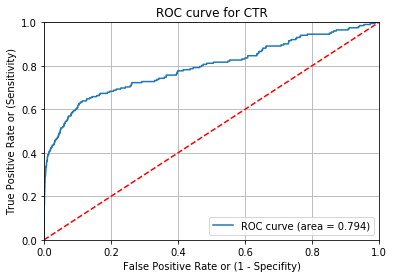

In [15]:
plot_ROC_curve(test_result['click'], test_result['click_pred_per'])
#xgboost的auc
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(test_result['click'], test_result['click_pred_per'])))

the AUC for LR is: 0.804681


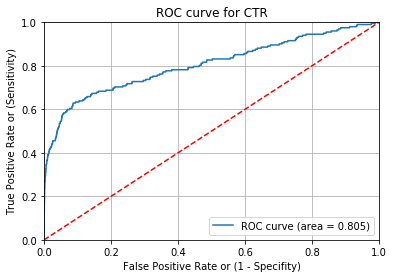

In [47]:
"""plot_ROC_curve(test_result1['click'], test_result1['click_pred_per'])
#xgboost的auc
print ("the AUC for LR is: {0:6f}".format(roc_auc_score(test_result1['click'], test_result1['click_pred_per'])))"""

## QR's Code

In [16]:
df_valid = pd.read_csv("/Users/weisihan/Downloads/we_data/validation.csv")

In [17]:
# parameters
total_budget = 6250000
payprice = df_valid['payprice'].as_matrix()
Train_df_qr = df_valid.copy()
test_predictions=test_result['click_pred_per']
#test_predictions2=test_result['click_pred_LR']

avgCTR = 1793/2430981 #train set
#tuning...

In [19]:
Train_df_qr.head()

click  weekday  hour                                     bidid  \
0      0        4    20  bbcb813b6166538503d8b33a5602d7d72f6019dc   
1      0        1    21  5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d   
2      0        4     8  f6ece71dae81d6b16bfb24ad6dd5611472d4c673   
3      0        5    15  b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb   
4      0        1    18  0899bf144249458ea9c89188473694bf44c7ca15   

                                     userid       useragent             IP  \
0  663169f66491c98c69f1f94a5c48fa34aa9fe06f      windows_ie  211.144.203.*   
1  a23f0cfab6592c137f796e68fa752fceba08bb1b  windows_chrome   58.247.250.*   
2  5105a013ea54a9706146033e6a138d5234a3803e      windows_ie   117.12.111.*   
3  577e9a768ce17e73c61ba7022db927f9ee761830  windows_chrome   61.187.224.*   
4  e4bf79c562745d671b19f2edf7fda89c2e25987f  windows_chrome   117.41.145.*   

   region  city  adexchange                       ...                         \
0      79    79         1.0                       ...                          
1      79    79         1.0                       ...                          
2       2     2         2.0                       ...                          
3     201   205         2.0                       ...                          
4     134   135         2.0                       ...                          

  slotheight slotvisibility  slotformat slotprice  \
0        600              2           1         0   
1         90              0           1         0   
2        250              2           0         5   
3        280              2           0         5   
4        200              1           0         5   

                           creative  bidprice payprice  \
0  cb7c76e7784031272e37af8e7e9b062c       300       23   
1  c938195f9e404b4f38c7e71bf50263e5       238       75   
2  911b2d84826786018761e8c0b0a3a60c       238       65   
3  dc0998c10f8f0b623b5d949e8272e4c7       238        6   
4  23485fcd23122d755d38f8c89d46ca56       249        5   

                            keypage  advertiser  \
0  bebefa5efe83beee17a3d245e7c5085b        1458   
1  a3becb967c015e9acb5e72f22b100ef8        3476   
2  d29e59bf0f7f8243858b8183f14d4412        3358   
3  d29e59bf0f7f8243858b8183f14d4412        3358   
4  7e0e909ea89f707bc20f9585c9072081        3476   

                                           usertag  
0                                      13866,10111  
1  10075,10057,10024,10052,10083,10063,10006,10110  
2  13866,10024,10059,10063,13776,10083,10006,10111  
3                    13866,10057,10006,10063,10110  
4                          10006,10063,13776,10110  

[5 rows x 25 columns]

In [20]:
def generate_bidprice(base_bid, test_predictions):
    avgCTR = 1793/2430981#train set
    bidprices = base_bid*test_predictions/avgCTR
    return bidprices

In [21]:
def Prob3(Train_df,payprice,base_bid,test_predictions):
    Train_Const_summ = pd.DataFrame({'Clicks':'', 'Spend':'', 'CTR':'', 'CPM':'', 'eCPC':''}, index=[0])
    
    current_budget = total_budget
    Train_df['win'] = 0 #initialize win label
    bidprices = generate_bidprice(base_bid, test_predictions)
    #start biding...
    for i in Train_df.index:
        if current_budget >= bidprices[i]:
            #generate bidprice:
            current_bidprice = bidprices[i]

            #Winning criterion:
            current_payprice = payprice[i]
            if current_bidprice > current_payprice:
                Train_df.at[i, 'win'] = int(1)
                current_budget = current_budget - current_payprice
            else:
                Train_df.at[i, 'win'] = int(0)
        else:
            print('lack of budget!',current_budget)
            break
    #biding end        
    
    Train_df_new = Train_df[Train_df['win']!=0]
    #wintimes,_ = Train_df_new.shape
    #print('wintimes:',wintimes)
    #print('current_budget',current_budget)

    Clk = Train_df_new['click'].sum()
    Imp = Train_df_new['click'].count()
    CTR = Clk/Imp
    Spd = total_budget - current_budget
    CPM = 1000*Spd/Imp
    eCPC = Spd/Clk
    
    Train_Const_summ.loc[0,'Clicks']=Clk
    Train_Const_summ.loc[0,'Spend']=Spd
    Train_Const_summ.loc[0,'CTR']=CTR
    Train_Const_summ.loc[0,'CPM']=CPM
    Train_Const_summ.loc[0,'eCPC']=eCPC

    print(Train_Const_summ)
    
        
    return Train_df,current_budget

In [44]:
#Train_df,current_budget = Prob3(Train_df_qr,payprice,base_bid,test_predictions)

In [22]:
def calculate_click(base_bid,Train_df,payprice,test_predictions):
    print('base_bid:',base_bid)
    result_df,current_budget = Prob3(Train_df,payprice,base_bid,test_predictions)
    print('current_budget:',current_budget)
    Train_df_new = result_df[result_df['win']!=0]
    wintimes,_ = Train_df_new.shape
    print('wintimes:',wintimes)
    print('----------------')
    Clk = Train_df_new['click'].sum()    
    return Clk

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import mpld3
import numpy as np

In [24]:
base_bids = np.arange(10,100,10)
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 10
       CPM         CTR Clicks   Spend     eCPC
0  22809.7  0.00578568     69  272028  3942.43
current_budget: 5977972
wintimes: 11926
----------------
base_bid: 20
       CPM         CTR Clicks   Spend     eCPC
0  28766.6  0.00323446     88  782653  8893.78
current_budget: 5467347
wintimes: 27207
----------------
base_bid: 30
       CPM         CTR Clicks    Spend     eCPC
0  31445.2  0.00233185    102  1375477  13485.1
current_budget: 4874523
wintimes: 43742
----------------
base_bid: 40
       CPM        CTR Clicks    Spend   eCPC
0  34392.3  0.0019108    114  2051881  17999
current_budget: 4198119
wintimes: 59661
----------------
base_bid: 50
     CPM         CTR Clicks    Spend     eCPC
0  37492  0.00162684    122  2811603  23045.9
current_budget: 3438397
wintimes: 74992
----------------
base_bid: 60
       CPM        CTR Clicks    Spend     eCPC
0  40324.1  0.0014074    127  3638730  28651.4
current_budget: 2611270
wintimes: 90237
----------------
base_bid: 70
       

In [25]:
base_bids = np.arange(100,200,10)
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 100
lack of budget! 126
     CPM         CTR Clicks    Spend   eCPC
0  49193  0.00103111    131  6249874  47709
current_budget: 126
wintimes: 127048
----------------
base_bid: 110
lack of budget! 278
       CPM         CTR Clicks    Spend     eCPC
0  50774.8  0.00101554    125  6249722  49997.8
current_budget: 278
wintimes: 123087
----------------
base_bid: 120
lack of budget! 419
       CPM        CTR Clicks    Spend     eCPC
0  52181.6  0.0010103    121  6249581  51649.4
current_budget: 419
wintimes: 119766
----------------
base_bid: 130
lack of budget! 25884
       CPM          CTR Clicks    Spend     eCPC
0  53399.8  0.000960903    112  6224116  55572.5
current_budget: 25884
wintimes: 116557
----------------
base_bid: 140
lack of budget! 4512
       CPM          CTR Clicks    Spend   eCPC
0  54416.5  0.000932283    107  6245488  58369
current_budget: 4512
wintimes: 114772
----------------
base_bid: 150
lack of budget! 768
       CPM          CTR Clicks    Spend     eCPC
0

In [52]:
base_bids = np.arange(100,200,10)
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 100
lack of budget! 59594
       CPM          CTR Clicks    Spend    eCPC
0  76499.4  0.000667318     54  6190406  114637
current_budget: 59594
wintimes: 80921
----------------
base_bid: 110
lack of budget! 2724
       CPM          CTR Clicks    Spend    eCPC
0  76839.4  0.000664182     54  6247276  115690
current_budget: 2724
wintimes: 81303
----------------
base_bid: 120
lack of budget! 19031
       CPM          CTR Clicks    Spend    eCPC
0  77080.7  0.000668011     54  6230969  115388
current_budget: 19031
wintimes: 80837
----------------
base_bid: 130
lack of budget! 14599
       CPM          CTR Clicks    Spend    eCPC
0  77313.4  0.000669552     54  6235401  115470
current_budget: 14599
wintimes: 80651
----------------
base_bid: 140
lack of budget! 37330
       CPM          CTR Clicks    Spend    eCPC
0  77450.2  0.000673191     54  6212670  115049
current_budget: 37330
wintimes: 80215
----------------
base_bid: 150
lack of budget! 32196
       CPM          CTR Clicks 

In [27]:
base_bids = np.arange(85,95,1)
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 85
       CPM         CTR Clicks    Spend     eCPC
0  46341.8  0.00111367    139  5784015  41611.6
current_budget: 465985
wintimes: 124812
----------------
base_bid: 86
       CPM         CTR Clicks    Spend     eCPC
0  46546.2  0.00110328    139  5864264  42188.9
current_budget: 385736
wintimes: 125988
----------------
base_bid: 87
       CPM         CTR Clicks    Spend     eCPC
0  46754.5  0.00110072    140  5946664  42476.2
current_budget: 303336
wintimes: 127189
----------------
base_bid: 88
       CPM         CTR Clicks    Spend     eCPC
0  46958.6  0.00108998    140  6031500  43082.1
current_budget: 218500
wintimes: 128443
----------------
base_bid: 89
       CPM      CTR Clicks    Spend   eCPC
0  47141.9  0.00108    140  6111005  43650
current_budget: 138995
wintimes: 129630
----------------
base_bid: 90
     CPM         CTR Clicks    Spend   eCPC
0  47321  0.00108572    142  6189069  43585
current_budget: 60931
wintimes: 130789
----------------
base_bid: 91
lack of bu

In [ ]:
#summary
basebid=90, clicks is 142, out of budget, 2167 money left


In [ ]:
1+2